In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [22]:
df = pd.read_csv('Seoul PM10 data.csv')
df

,date,PM-10
0,2022-12-08:24,22.0
1,2022-12-08:23,22.0
2,2022-12-08:22,25.0
3,2022-12-08:21,23.0
4,2022-12-08:20,20.0
...,...,...
190,2022-12-01:02,12.0
191,2022-12-01:01,15.0
192,NaN,NaN
193,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    192 non-null    object 
 1   PM-10   192 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.2+ KB


In [8]:
df.describe()

,PM-10
count,192.000000
mean,24.572917
std,9.278410
min,9.000000
25%,18.000000
50%,23.000000
75%,30.000000
max,61.000000


## 시간에 따른 미세먼지 농도를 적절한 그래프로 시각화하기
- x축은 date, y축은 PM-10

In [23]:
df.dropna(inplace=True)

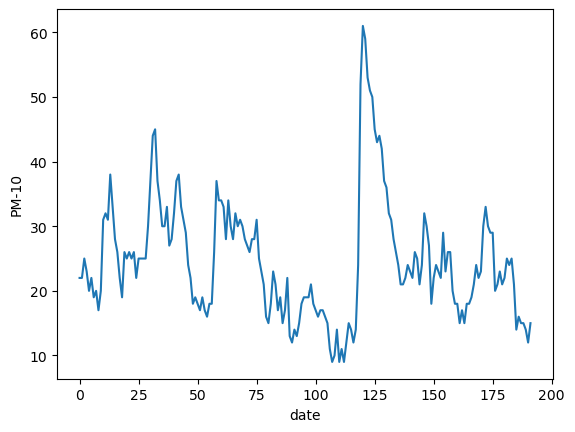

In [28]:
plt.plot(range(len(df)), df['PM-10'])
plt.xlabel('date')
plt.ylabel('PM-10')
plt.show()

## 시간대별 평균 미세먼지 농도를 계산
### t시의 평균 농도를 구하시오. 
- 시간대별로 그룹화 -> PM-10으로 평균 구하기

In [32]:
df['time'] = df['date'].str.slice(-2, )

In [33]:
df.head()

,date,PM-10,time
0,2022-12-08:24,22.0,24
1,2022-12-08:23,22.0,23
2,2022-12-08:22,25.0,22
3,2022-12-08:21,23.0,21
4,2022-12-08:20,20.0,20


In [44]:
df.groupby('time')['PM-10'].mean()

time
01    25.875
02    22.000
03    21.000
04    21.000
05    21.375
06    21.375
07    20.250
08    22.375
09    23.125
10    22.750
11    27.000
12    25.125
13    25.250
14    28.000
15    24.500
16    24.500
17    26.500
18    25.500
19    25.125
20    27.000
21    28.125
22    28.125
23    27.250
24    26.625
Name: PM-10, dtype: float64

## 시점 t의 농도를 시점 (t-1), (t-2), (t-3), (t-4)로 예측하는 모델 만들기
- 각 시점에 맞는 데이터 가져오기

In [58]:
for k in range(1, 5):
    df['PM-10_' + str(k)] = df['PM-10'].shift(-k)

df.dropna(inplace=True)
# df = df.drop(['date', 'time'], axis=1)

In [60]:
df = df.drop(['PM-101', 'PM-102', 'PM-103', 'PM-104'], axis=1)

In [61]:
df

,PM-10,PM-10_1,PM-10_2,PM-10_3,PM-10_4
0,22.0,22.0,25.0,23.0,20.0
1,22.0,25.0,23.0,20.0,22.0
2,25.0,23.0,20.0,22.0,19.0
3,23.0,20.0,22.0,19.0,20.0
4,20.0,22.0,19.0,20.0,17.0
...,...,...,...,...,...
175,29.0,20.0,21.0,23.0,21.0
176,20.0,21.0,23.0,21.0,22.0
177,21.0,23.0,21.0,22.0,25.0
178,23.0,21.0,22.0,25.0,24.0


In [64]:
from sklearn.linear_model import LinearRegression

X = df.drop('PM-10', axis = 1)
y = df['PM-10']

model = LinearRegression().fit(X, y)

In [70]:
predicted_data = model.predict(X)

In [75]:
df['predicted_PM-10'] = predicted_data